### Project 1 - Group 2

### Project Title: FIFA Soccer Analysis – insights into European clubs and their players from 2015 to 2021

### Team Members:

###  * Sandhalie Fernando
###  * Cassie Guo
###  * Samy George
###  * Sandy Berahim
###  * Graham Meadon


In [164]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# FIFA data files
FIFA_players_2017_path = "./data/players_17.csv"
FIFA_players_2021_path = "./data/players_21.csv"

# Read the FIFA Players data
FIFA_players_2017_metadata = pd.read_csv(FIFA_players_2017_path)
FIFA_players_2021_metadata = pd.read_csv(FIFA_players_2021_path)

# Combine the data into a single dataset
combined_original_data_df = pd.merge(FIFA_players_2017_metadata, FIFA_players_2021_metadata, how = "outer", on = 'sofifa_id', suffixes = ("_2017","_2021"))

# Display the data table for preview
combined_original_data_df

,sofifa_id,short_name_2017,long_name_2017,age_2017,dob_2017,height_cm_2017,weight_kg_2017,nationality_2017,club_name_2017,league_name_2017,league_rank_2017,overall_2017,potential_2017,value_eur_2017,wage_eur_2017,player_positions_2017,preferred_foot_2017,international_reputation_2017,weak_foot_2017,skill_moves_2017,work_rate_2017,body_type_2017,real_face_2017,release_clause_eur_2017,player_tags_2017,team_position_2017,team_jersey_number_2017,loaned_from_2017,joined_2017,contract_valid_until_2017,nation_position_2017,nation_jersey_number_2017,pace_2017,shooting_2017,passing_2017,dribbling_2017,defending_2017,physic_2017,gk_diving_2017,gk_handling_2017,gk_kicking_2017,gk_reflexes_2017,gk_speed_2017,gk_positioning_2017,player_traits_2017,attacking_crossing_2017,attacking_finishing_2017,attacking_heading_accuracy_2017,attacking_short_passing_2017,attacking_volleys_2017,skill_dribbling_2017,skill_curve_2017,skill_fk_accuracy_2017,skill_long_passing_2017,skill_ball_control_2017,movement_acceleration_2017,movement_sprint_speed_2017,movement_agility_2017,movement_reactions_2017,movement_balance_2017,power_shot_power_2017,power_jumping_2017,power_stamina_2017,power_strength_2017,power_long_shots_2017,mentality_aggression_2017,mentality_interceptions_2017,mentality_positioning_2017,mentality_vision_2017,mentality_penalties_2017,mentality_composure_2017,defending_marking_2017,defending_standing_tackle_2017,defending_sliding_tackle_2017,goalkeeping_diving_2017,goalkeeping_handling_2017,goalkeeping_kicking_2017,goalkeeping_positioning_2017,goalkeeping_reflexes_2017,short_name_2021,long_name_2021,age_2021,dob_2021,height_cm_2021,weight_kg_2021,nationality_2021,club_name_2021,league_name_2021,league_rank_2021,overall_2021,potential_2021,value_eur_2021,wage_eur_2021,player_positions_2021,preferred_foot_2021,international_reputation_2021,weak_foot_2021,skill_moves_2021,work_rate_2021,body_type_2021,real_face_2021,release_clause_eur_2021,player_tags_2021,team_position_2021,team_jersey_number_2021,loaned_from_2021,joined_2021,contract_valid_until_2021,nation_position_2021,nation_jersey_number_2021,pace_2021,shooting_2021,passing_2021,dribbling_2021,defending_2021,physic_2021,gk_diving_2021,gk_handling_2021,gk_kicking_2021,gk_reflexes_2021,gk_speed_2021,gk_positioning_2021,player_traits_2021,attacking_crossing_2021,attacking_finishing_2021,attacking_heading_accuracy_2021,attacking_short_passing_2021,attacking_volleys_2021,skill_dribbling_2021,skill_curve_2021,skill_fk_accuracy_2021,skill_long_passing_2021,skill_ball_control_2021,movement_acceleration_2021,movement_sprint_speed_2021,movement_agility_2021,movement_reactions_2021,movement_balance_2021,power_shot_power_2021,power_jumping_2021,power_stamina_2021,power_strength_2021,power_long_shots_2021,mentality_aggression_2021,mentality_interceptions_2021,mentality_positioning_2021,mentality_vision_2021,mentality_penalties_2021,mentality_composure_2021,defending_marking_2021,defending_standing_tackle_2021,defending_sliding_tackle_2021,goalkeeping_diving_2021,goalkeeping_handling_2021,goalkeeping_kicking_2021,goalkeeping_positioning_2021,goalkeeping_reflexes_2021
0,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,31.0,5/02/1985,185.0,80.0,Portugal,Real Madrid,Spain Primera Division,1.0,94.0,94.0,87000000.0,575000.0,"LW, LM, ST",Right,5.0,4.0,5.0,High/Low,C. Ronaldo,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,1/07/2009,2018.0,LS,7.0,92.0,92.0,81.0,91.0,33.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84.0,93.0,87.0,82.0,88.0,93.0,81.0,77.0,72.0,92.0,91.0,92.0,90.0,96.0,63.0,94.0,95.0,92.0,80.0,92.0,63.0,29.0,94.0,85.0,85.0,86.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35.0,5/02/1985,187.0,83.0,Portugal,Juventus,Italian Serie A,1.0,92.0,92.0,46000000.0,220000.0,"ST, LW",Right,5.0,4.0,5.0,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7

# English Premier League 2021.
---
### Base on the 2021 EPL result, analyse the winning club and its team member performance and how the club spending affect the performance. 

The overall spending of the club does affect the club performance as shown in the anlysis charts below. The club that spend the most are able to get a better performance team player. Depending on the club strategy, some of the top performing clubs tend to invest heavily on certain age group while others invest on a broader age group. The top performing player in the club tend to peak at the age of 29 or 30 years old before starting to see a decrease in their performance.

### Compare the top club and the last club player overall perfomance.

In [165]:
import hvplot.pandas
import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

clubRank2021 = {'Manchester City': 1,'Manchester United': 2,'Leicester City': 3,'Liverpool': 4,'Chelsea': 5,
            'West Ham United': 6,'Arsenal': 7,'Leeds United': 8,'Tottenham Hotspur': 9, 'Everton': 10,
            'Aston Villa': 11,'Crystal Palace': 12,'Newcastle United': 13,'Southampton': 14, 'Wolverhampton Wanderers': 15,
            'Burnley': 16,'Brighton & Hove Albion': 17,'Sheffield United': 18,'Fulham': 19, 'West Bromwich Albion': 20}

clubLat = {'Manchester City': 53.483135,'Manchester United': 53.463493,'Leicester City': 52.620640,'Liverpool': 53.430759,'Chelsea': 51.481834,
            'West Ham United': 51.538811,'Arsenal': 51.554867,'Leeds United': 53.777782,'Tottenham Hotspur': 51.604252, 'Everton': 53.438751,
            'Aston Villa': 52.509090,'Crystal Palace': 51.398338,'Newcastle United': 54.975170,'Southampton': 50.906052, 'Wolverhampton Wanderers': 52.590382,
            'Burnley': 53.789108,'Brighton & Hove Albion': 50.861782,'Sheffield United': 53.370321,'Fulham': 51.474895, 'West Bromwich Albion': 52.505497978}

clubLong = {'Manchester City': -2.200941,'Manchester United': -2.292279,'Leicester City': -1.142770,'Liverpool': -2.961425,'Chelsea': -0.191390,
            'West Ham United': -0.017136,'Arsenal': -0.109112,'Leeds United': -1.573049,'Tottenham Hotspur': -0.067007, 'Everton': -2.966681,
            'Aston Villa': -1.885249,'Crystal Palace': -0.086084,'Newcastle United': -1.622539,'Southampton': -1.391692, 'Wolverhampton Wanderers': -2.130924,
            'Burnley': -2.230575,'Brighton & Hove Albion': -0.084357,'Sheffield United': -1.470741,'Fulham': -0.22178, 'West Bromwich Albion': -1.9583295}

FIFA_players_2021_metadata['club_rank'] = FIFA_players_2021_metadata['club_name'].apply(lambda x: clubRank2021.get(x))
FIFA_players_2021_metadata['club_lat'] = FIFA_players_2021_metadata['club_name'].apply(lambda x: clubLat.get(x))
FIFA_players_2021_metadata['club_long'] = FIFA_players_2021_metadata['club_name'].apply(lambda x: clubLong.get(x))

epl_players = FIFA_players_2021_metadata[FIFA_players_2021_metadata['league_name'] == "English Premier League"]

playerName = epl_players['long_name']
playerAge = epl_players['age']
playerHeight = epl_players['height_cm']
playerWeight = epl_players['weight_kg']
playerWage = epl_players['wage_eur']
playerClub = epl_players['club_name']
playerClubRank = epl_players['club_rank'].astype('int')
playerClubLat = epl_players['club_lat']
playerClubLong = epl_players['club_long']
playerPos = epl_players['player_positions']
playerTPos = epl_players['team_position']
playerOverStat = epl_players['overall']
playerAtck = ((epl_players['attacking_crossing'] + epl_players['attacking_finishing'] + epl_players['attacking_heading_accuracy'] + epl_players['attacking_short_passing'] + epl_players['attacking_volleys']) / 5).round(1)
playerSkl = ((epl_players['skill_dribbling'] + epl_players['skill_curve'] + epl_players['skill_fk_accuracy'] + epl_players['skill_long_passing'] + epl_players['skill_ball_control']) / 5).round(1)
playerMve = ((epl_players['movement_acceleration'] + epl_players['movement_sprint_speed'] + epl_players['movement_agility'] + epl_players['movement_reactions'] + epl_players['movement_balance']) / 5).round(1)
playerPwr = ((epl_players['power_shot_power'] + epl_players['power_jumping'] + epl_players['power_stamina'] + epl_players['power_strength'] + epl_players['power_long_shots']) / 5).round(1)
playerMty = ((epl_players['mentality_aggression'] + epl_players['mentality_interceptions'] + epl_players['mentality_positioning'] + epl_players['mentality_vision'] + epl_players['mentality_penalties'] + epl_players['mentality_composure']) / 6).round(1)
playerDfd = ((epl_players['defending_standing_tackle'] + epl_players['defending_sliding_tackle']) / 2).round(1)
playerGk = ((epl_players['goalkeeping_diving'] + epl_players['goalkeeping_handling'] + epl_players['goalkeeping_kicking'] + epl_players['goalkeeping_positioning'] + epl_players['goalkeeping_reflexes']) / 5).round(1)

clubPlayers = pd.DataFrame({"Name":playerName,
                            "Age":playerAge,
                            "Height(cm)":playerHeight,
                            "Weight(kg)":playerWeight,
                            "Wage(€)":playerWage,
                            "Player Position":playerPos,
                            "Team Position": playerTPos,
                            "Club Name":playerClub,
                            "Club Lat":playerClubLat,
                            "Club Long":playerClubLong,
                            "Club Rank":playerClubRank,
                            "Overall":playerOverStat,
                            "Attacking":playerAtck,
                            "Skill":playerSkl,
                            "Movement":playerMve,
                            "Power":playerPwr,
                            "Mentality":playerMty,
                            "Defending":playerDfd,
                            "Goalkeeping":playerGk}).sort_values(by=['Club Name'])

clubPlayers

,Name,Age,Height(cm),Weight(kg),Wage(€),Player Position,Team Position,Club Name,Club Lat,Club Long,Club Rank,Overall,Attacking,Skill,Movement,Power,Mentality,Defending,Goalkeeping
772,Sead Kolašinac,27,183,86,69000,"LB, LWB",SUB,Arsenal,51.554867,-0.109112,7,78,67.6,63.2,66.6,77.4,72.7,78.0,11.2
1568,Rob Holding,24,189,81,49000,CB,SUB,Arsenal,51.554867,-0.109112,7,75,51.0,50.2,62.0,58.4,59.7,77.0,12.4
9968,Matt Macey,25,198,93,12000,GK,SUB,Arsenal,51.554867,-0.109112,7,65,18.6,18.4,41.4,43.4,27.0,12.5,64.6
1500,Bukayo Saka,18,178,65,22000,"LM, LWB, RW",SUB,Arsenal,51.554867,-0.109112,7,75,62.6,67.4,80.8,61.8,64.0,60.0,10.0
1439,Cédric Ricardo Alves Soares,28,172,67,63000,"RB, RWB",SUB,Arsenal,51.554867,-0.109112,7,76,67.0,70.0,76.4,70.4,69.0,75.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17480,Taylor Perry,18,180,72,3000,CM,RES,Wolverhampton Wanderers,52.590382,-2.130924,15,55,48.4,56.0,62.6,57.6,52.5,48.5,10.8
480,Willy Boly,29,195,97,84000,CB,RCB,Wolverhampton Wanderers,52.590382,-2.130924,15,80,52.4,57.6,59.6,63.0,66.2,81.0,9.8
13890,Luke Matheson,17,168,62,500,RB,RES,Wolverhampton Wanderers,52.590382,-2.130924,15,61,44.4,48.8,72.0,53.0,50.0,54.5,9.0
300,Jonathan Castro Otto,26,170,70,86000,LWB,LWB,Wolverhampton Wanderers,52.590382,-2.130924,15,81,63.2,67.4,76.6,66.4,69.3,80.5,9.0


In [166]:
clubRank = clubPlayers['Club Rank'].unique()
clubPer_Mean = clubPlayers.groupby('Club Name')['Overall'].mean()
clubPer_Median = clubPlayers.groupby('Club Name')['Overall'].median()
clubPer_Var = clubPlayers.groupby('Club Name')['Overall'].var()
clubPer_Std = clubPlayers.groupby('Club Name')['Overall'].std()

clubPerStat = pd.DataFrame({"Club Rank":clubRank,
                            "Overall Mean Performance":clubPer_Mean,
                            "Overall Median Performance":clubPer_Median,
                            "Overall Performance Variance":clubPer_Var,
                            "Overall Performance Std. Dev.":clubPer_Std}).sort_values(by=['Club Rank'])

clubPerStat.index.name = None

clubPerStat

,Club Rank,Overall Mean Performance,Overall Median Performance,Overall Performance Variance,Overall Performance Std. Dev.
Manchester City,1,77.484848,80.0,82.507576,9.083368
Manchester United,2,77.818182,79.0,34.153409,5.844092
Leicester City,3,75.151515,75.0,38.757576,6.225558
Liverpool,4,78.575758,80.0,75.001894,8.660363
Chelsea,5,79.212121,79.0,18.047348,4.248217
West Ham United,6,71.303030,76.0,75.655303,8.698006
Arsenal,7,76.212121,77.0,37.547348,6.127589
Leeds United,8,67.969697,70.0,43.530303,6.597750
Tottenham Hotspur,9,77.242424,80.0,58.314394,7.636386
Everton,10,74.393939,77.0,46.308712,6.805050


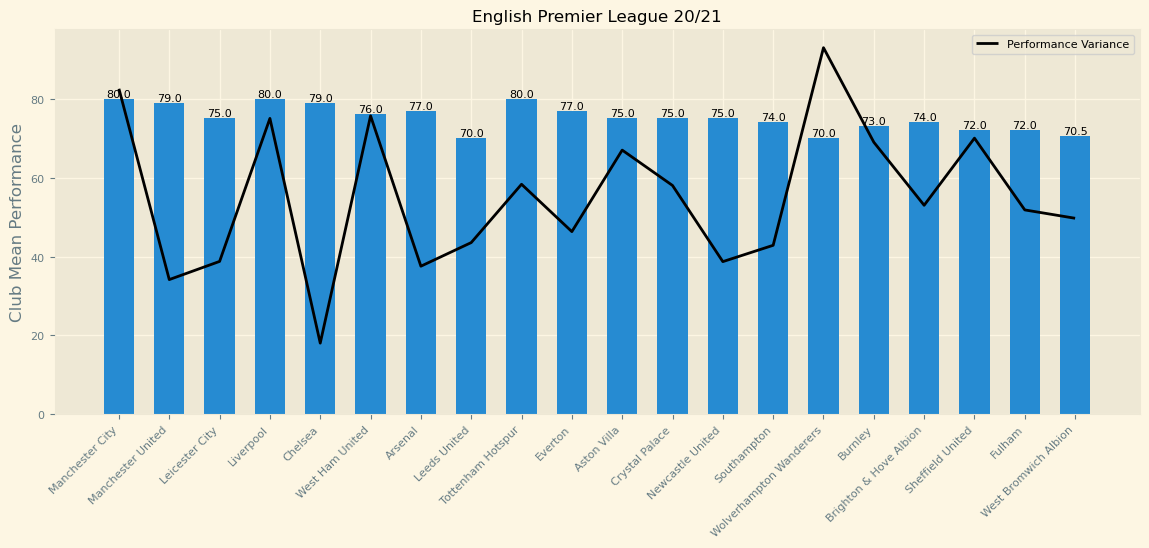

In [167]:
clubName = clubPerStat.index.values
clubMedPer = clubPerStat['Overall Median Performance']
clubVarPer = clubPerStat['Overall Performance Variance']

plt.style.use("Solarize_Light2")
plt.figure(figsize=(14, 5))
plt.bar(clubName,clubMedPer, width = 0.6)
plt.plot(clubName,clubVarPer, color = 'black',label = 'Performance Variance')
plt.title("English Premier League 20/21", fontsize = 12)
plt.ylabel("Club Mean Performance")
plt.xticks(rotation = 45,ha = 'right')
for a,b in zip(clubName, clubMedPer): 
    plt.text(a, b, str(b),fontsize=8,
        horizontalalignment = 'center',
        verticalalignment = 'bottom')
plt.legend()
plt.savefig("./data/player_perform", dpi=200)
plt.show()

In [168]:
clubLat = clubPlayers['Club Lat'].unique()
clubLong = clubPlayers['Club Long'].unique()
clubSpend = clubPlayers.groupby('Club Name')['Wage(€)'].sum()

clubPlayerStat = pd.DataFrame({"Club Rank":clubRank,
                               "Club Total Spend(€)":clubSpend,
                               "Club Lat":clubLat,
                               "Club Long":clubLong}).sort_values(by=['Club Rank'])

clubPlayerStat.index.name = None

clubPlayerStat

,Club Rank,Club Total Spend(€),Club Lat,Club Long
Manchester City,1,3765000,53.483135,-2.200941
Manchester United,2,2950000,53.463493,-2.292279
Leicester City,3,1981000,52.620640,-1.142770
Liverpool,4,3154000,53.430759,-2.961425
Chelsea,5,2698000,51.481834,-0.191390
West Ham United,6,850000,51.538811,-0.017136
Arsenal,7,2046000,51.554867,-0.109112
Leeds United,8,1212500,53.777782,-1.573049
Tottenham Hotspur,9,2542000,51.604252,-0.067007
Everton,10,1872000,53.438751,-2.966681


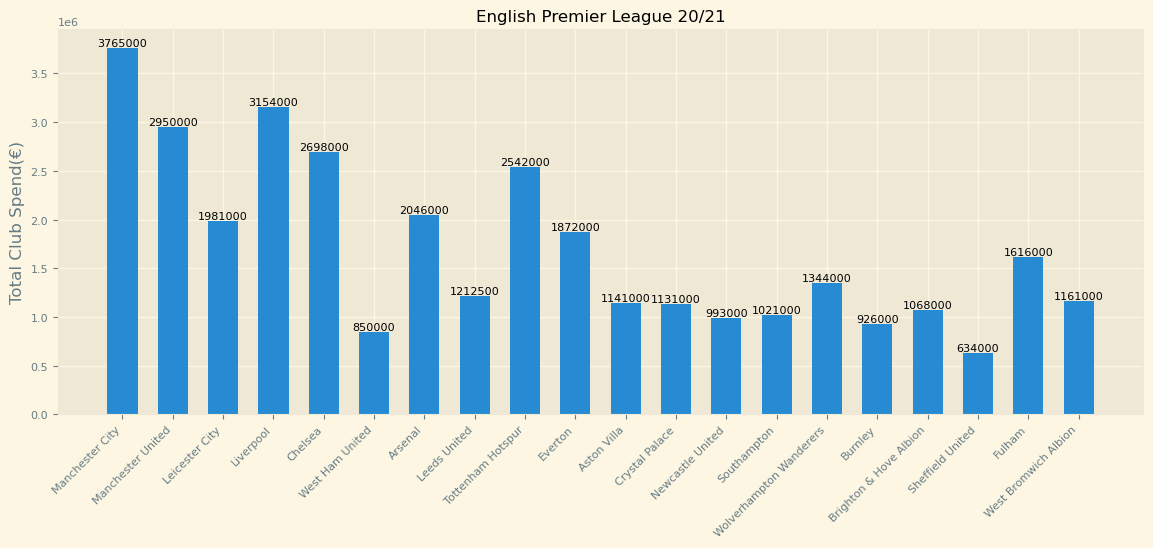

In [169]:
totalSpend = clubPlayerStat['Club Total Spend(€)']

plt.style.use("Solarize_Light2")
plt.figure(figsize=(14, 5))
plt.bar(clubName,totalSpend, width = 0.6)
plt.title("English Premier League 20/21", fontsize = 12)
plt.ylabel("Total Club Spend(€)")
plt.xticks(rotation = 45,ha = 'right')
for a,b in zip(clubName, totalSpend): 
    plt.text(a, b, str(b),fontsize=8,
        horizontalalignment = 'center',
        verticalalignment = 'bottom')
plt.savefig("./data/club_spending", dpi=200)
plt.show()

In [170]:
# Configure the map plot
clubMap = clubPlayerStat.hvplot.points(
    "Club Long",
    "Club Lat",
    title = "English Premier League 2021",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    color = clubPerStat.index.values,
    scale = 1,
)

# Display the map
clubMap

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Club Long,Club Lat]   (_color)

The correlation between player age and player's overall stats for Manchester City team is 0.62
The correlation between player age and player's overall stats for West Bromwich Albion team is 0.73


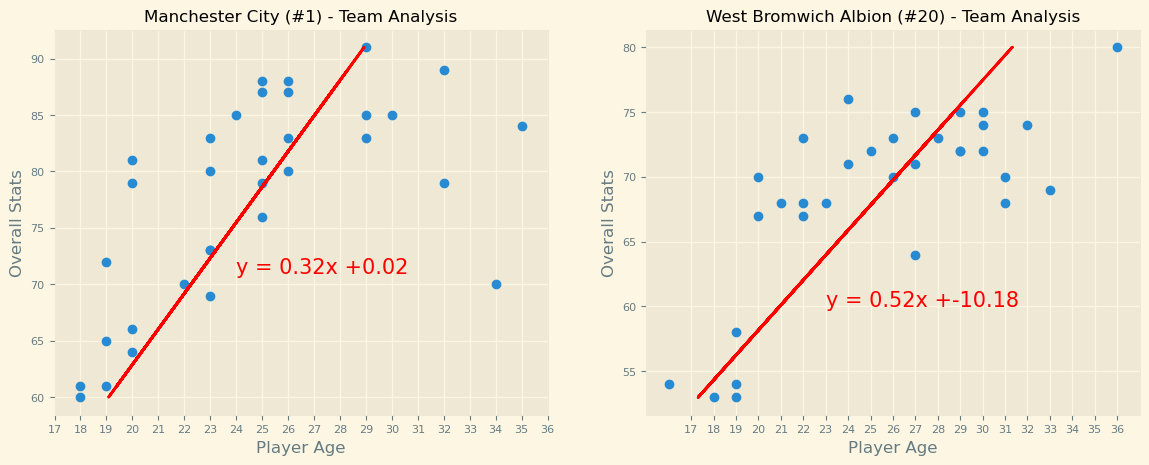

In [171]:
club_ManCity = clubPlayers[clubPlayers['Club Name'] == 'Manchester City']
playerAge_ManCity = club_ManCity['Age']
playerStat_ManCity = club_ManCity['Overall']

club_WestBrom = clubPlayers[clubPlayers['Club Name'] == 'West Bromwich Albion']
playerAge_WestBrom = club_WestBrom['Age']
playerStat_WestBrom = club_WestBrom['Overall']

corr_ManCity = st.pearsonr(playerStat_ManCity,playerAge_ManCity)
(slope_Mancity, intercept_Mancity, rvalue_Mancity, pvalue_Mancity, stderr_Mancity) = linregress(playerStat_ManCity,playerAge_ManCity)
regress_Mancity = playerStat_ManCity * slope_Mancity + intercept_Mancity
line_eq_Mancity = "y = " + str(round(slope_Mancity,2)) + "x +" + str(round(intercept_Mancity,2))

corr_WestBrom = st.pearsonr(playerStat_WestBrom,playerAge_WestBrom)
(slope_WestBrom, intercept_WestBrom, rvalue_WestBrom, pvalue_WestBrom, stderr_WestBrom) = linregress(playerStat_WestBrom,playerAge_WestBrom)
regress_WestBrom = playerStat_WestBrom * slope_WestBrom + intercept_WestBrom
line_eq_WestBrom = "y = " + str(round(slope_WestBrom,2)) + "x +" + str(round(intercept_WestBrom,2))

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(playerAge_ManCity,playerStat_ManCity)
plt.plot(regress_Mancity,playerStat_ManCity,"r-")
plt.text(playerAge_ManCity.min()+6,playerStat_ManCity.max()-20,line_eq_Mancity,fontsize=15,color="red")
plt.title("Manchester City (#1) - Team Analysis", fontsize = 12)
plt.xlabel("Player Age")
plt.ylabel("Overall Stats")
print(f"The correlation between player age and player's overall stats for Manchester City team is {round(corr_ManCity[0],2)}")
plt.xticks(range(17,37))

plt.subplot(1, 2, 2)
plt.scatter(playerAge_WestBrom,playerStat_WestBrom)
plt.plot(regress_WestBrom,playerStat_WestBrom,"r-")
plt.text(playerAge_WestBrom.min()+7,playerStat_WestBrom.max()-20,line_eq_WestBrom,fontsize=15,color="red")
plt.title("West Bromwich Albion (#20) - Team Analysis", fontsize = 12)
plt.xlabel("Player Age")
plt.ylabel("Overall Stats")
print(f"The correlation between player age and player's overall stats for West Bromwich Albion team is {round(corr_WestBrom[0],2)}")
plt.xticks(range(17,37))
plt.savefig("./data/club_analysis", dpi=200)
plt.show()

In [172]:
attributes = ["Attacking", "Skill", "Movement", "Power", "Mentality", "Defending"]

ManCityclubAtt = []
WestBromclubAtt = []

for att in attributes:
    ManCityplayerAtt = []
    ManCityattr = club_ManCity[att].values
    ManCityplayerAtt.append(ManCityattr)


    ManCitylowerq = np.quantile(ManCityplayerAtt,[.25])
    ManCityupperq = np.quantile(ManCityplayerAtt,[.75])
    ManCityiqr = ManCityupperq - ManCitylowerq

    ManCitylowerBound = ManCitylowerq - (1.5*ManCityiqr)
    ManCityupperBound = ManCityupperq + (1.5*ManCityiqr)

    print(f"Manchester City's potential {att} outliers: lower bound {ManCitylowerBound} upper bound {ManCityupperBound}")
    ManCityclubAtt.append(ManCityattr)

    WestBromplayerAtt = []
    WestBromattr = club_WestBrom[att].values
    WestBromplayerAtt.append(WestBromattr)


    WestBromlowerq = np.quantile(WestBromplayerAtt,[.25])
    WestBromupperq = np.quantile(WestBromplayerAtt,[.75])
    WestBromiqr = WestBromupperq - WestBromlowerq

    WestBromlowerBound = WestBromlowerq - (1.5*WestBromiqr)
    WestBromupperBound = WestBromupperq + (1.5*WestBromiqr)

    print(f"West Bromwich Albion's potential {att} outliers: lower bound {WestBromlowerBound} upper bound {WestBromupperBound}")
    WestBromclubAtt.append(WestBromattr)

Manchester City's potential Attacking outliers: lower bound [20.] upper bound [103.2]
West Bromwich Albion's potential Attacking outliers: lower bound [17.] upper bound [90.6]
Manchester City's potential Skill outliers: lower bound [28.2] upper bound [105.]
West Bromwich Albion's potential Skill outliers: lower bound [18.3] upper bound [91.1]
Manchester City's potential Movement outliers: lower bound [41.3] upper bound [102.9]
West Bromwich Albion's potential Movement outliers: lower bound [33.425] upper bound [96.425]
Manchester City's potential Power outliers: lower bound [35.5] upper bound [95.5]
West Bromwich Albion's potential Power outliers: lower bound [31.] upper bound [89.8]
Manchester City's potential Mentality outliers: lower bound [29.] upper bound [97.8]
West Bromwich Albion's potential Mentality outliers: lower bound [27.7375] upper bound [83.6375]
Manchester City's potential Defending outliers: lower bound [-26.75] upper bound [143.25]
West Bromwich Albion's potential De

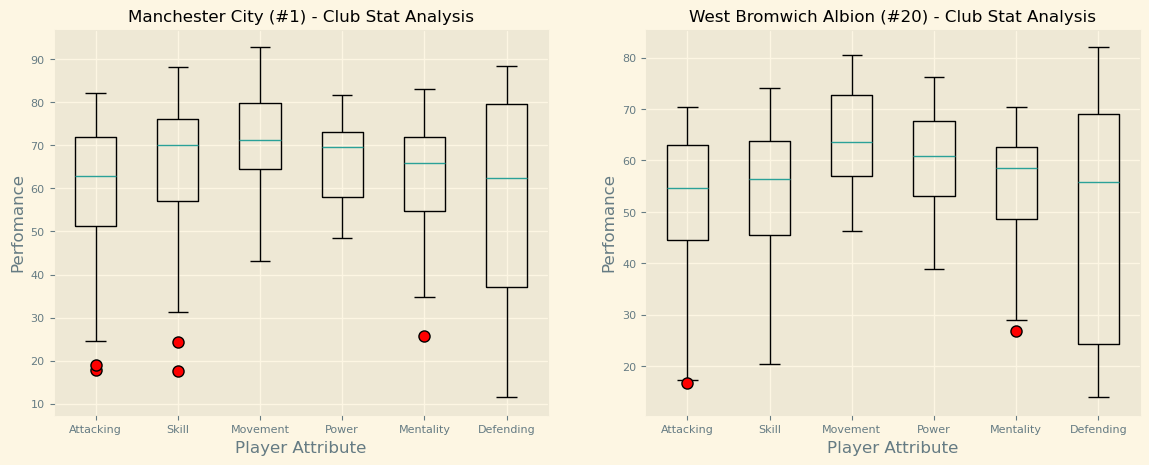

In [173]:
flierprops = dict(markerfacecolor='r', markersize=8, linestyle='none')
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.boxplot(ManCityclubAtt, labels = attributes, flierprops = flierprops)
plt.title("Manchester City (#1) - Club Stat Analysis", fontsize = 12)
plt.xlabel("Player Attribute")
plt.ylabel("Perfomance")

plt.subplot(1, 2, 2)
plt.boxplot(WestBromclubAtt, labels = attributes, flierprops = flierprops)
plt.title("West Bromwich Albion (#20) - Club Stat Analysis", fontsize = 12)
plt.xlabel("Player Attribute")
plt.ylabel("Perfomance")
plt.savefig("./data/club_stat_analysis", dpi=200)
plt.show()